# Experiment 2.2.1
Inspecting receptive field sizes.

In [1]:
import tempfile
import zipfile
import urllib
import numpy as np
import torch
import pathlib
import torchvision as tv
import torchvision.datasets
import torchvision.transforms
import pandas as pd
from icecream import ic
import json
import xarray as xr
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits as mplt
import mpl_toolkits.axes_grid1
from collections import namedtuple
import ipyplot
import cv2
import einops
import PIL
import PIL.ImageCms
import IPython
import nncolor.colornet as colornet
import math
import re
import timm
import torch_receptive_field as rf 

In [11]:
class TestResNet(tv.models.ResNet):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.feature_maps = [self.conv1, self.layer1, self.layer2, self.layer3,
                             self.layer4]
        
    def _forward_impl(self, x: torch.Tensor) -> torch.Tensor:
        # See note [TorchScript super()]
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        # Stop above.
        #x = self.avgpool(x)
        # x = torch.flatten(x, 1)
        # x = self.fc(x)
        #x = self.fc(x)
        return x
    
def model_fn():
    #m = tv.models.resnet50(pretrained=True)
    m = TestResNet(tv.models.resnet.Bottleneck, [3, 4, 6, 3])
    m.feature_maps = [m.conv1, m.layer1]
    return m
model = model_fn()

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # PyTorch v0.4.0
#model = timm.models.resnet50(pretrained=True)
model = model.to(device)

In [54]:
receptive_field_dict = rf.receptive_field(model, (3, 224, 224))
rf.receptive_field_for_unit(receptive_field_dict, "1", (4,4))

------------------------------------------------------------------------------
        Layer (type)    map size      start       jump receptive_field 
        0             [224, 224]        0.5        1.0             1.0 
        1             [112, 112]        0.5        2.0             7.0 
        2             [112, 112]        0.5        2.0             7.0 
        3             [112, 112]        0.5        2.0             7.0 
        4               [56, 56]        0.5        4.0            11.0 
        5               [56, 56]        0.5        4.0            11.0 
        6               [56, 56]        0.5        4.0            11.0 
        7               [56, 56]        0.5        4.0            11.0 
        8               [56, 56]        0.5        4.0            19.0 
        9               [56, 56]        0.5        4.0            19.0 
        10              [56, 56]        0.5        4.0            19.0 
        11              [56, 56]        0.5        4.0   

[(5.0, 12.0), (5.0, 12.0)]

In [53]:
list(receptive_field_dict.values())[-2]

OrderedDict([('j', 256.0),
             ('r', 1963.0),
             ('start', 0.5),
             ('input_shape', [-1, 2048, 7, 7]),
             ('output_shape', [-1, 2048, 7, 7])])

In [74]:
t = [a for a,b in dict({'a':1,'b':2,'c':3,'d':4}).items()]
x,y = zip(*[(k,v['r']) for (k,v) in list(receptive_field_dict.items())[:-20]])
#x,y = zip(*[(k,v['r']) for (k,v) in list(receptive_field_dict.items())[:-80]])

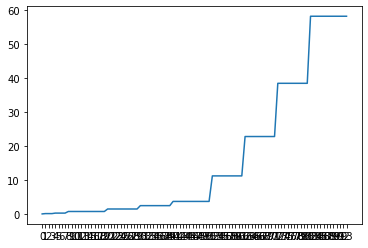

In [73]:
yn = np.array(y, dtype='float32')
yn = 100* (yn * yn) / (224.0*224.0)
plt.plot(x,yn)

In [68]:
xn

array([0.00000000e+00, 1.99298465e-05, 7.97193861e-05, 1.79368624e-04,
       3.18877544e-04, 4.98246169e-04, 7.17474497e-04, 9.76562500e-04,
       1.27551018e-03, 1.61431765e-03, 1.99298467e-03, 2.41151149e-03,
       2.86989799e-03, 3.36814416e-03, 3.90625000e-03, 4.48421575e-03,
       5.10204071e-03, 5.75972581e-03, 6.45727059e-03, 7.19467457e-03,
       7.97193870e-03, 8.78906250e-03, 9.64604598e-03, 1.05428891e-02,
       1.14795920e-02, 1.24561545e-02, 1.34725766e-02, 1.45288585e-02,
       1.56250000e-02, 1.67610012e-02, 1.79368630e-02, 1.91525836e-02,
       2.04081628e-02, 2.17036027e-02, 2.30389033e-02, 2.44140625e-02,
       2.58290824e-02, 2.72839610e-02, 2.87786983e-02, 3.03132981e-02,
       3.18877548e-02, 3.35020721e-02, 3.51562500e-02, 3.68502885e-02,
       3.85841839e-02, 4.03579399e-02, 4.21715565e-02, 4.40250337e-02,
       4.59183678e-02, 4.78515625e-02, 4.98246178e-02, 5.18375337e-02,
       5.38903065e-02, 5.59829399e-02, 5.81154339e-02, 6.02877885e-02,
      